In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans ,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [2]:
n_samples = 1500

dataset1 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]
dataset2 = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
dataset3 = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
dataset4= np.random.rand(n_samples, 2)


dataset5= pd.read_csv("dataset5.csv").values
dataset6= pd.read_csv("dataset6.csv").values
dataset7= pd.read_csv("dataset7.csv").values
dataset8= pd.read_csv("dataset8.csv").values
dataset9= pd.read_csv("dataset9.csv").values

In [3]:
def clusters_comparison(data,KMeans_n_clusters=2,hierarchical_n_clusters=2,hierarchical_linkage='single' ,
         DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,GM_n_components=2,GM_covariance_type='full',
         random_state=0 ):
    
    seed =0
    plt.scatter(data[:,0],data[:,1])
    plt.title('data')
    plt.show()

    z = StandardScaler()
    data = z.fit_transform(data)
    KM    = KMeans(n_clusters=KMeans_n_clusters,
                   random_state=seed).fit(data)
    HC    = AgglomerativeClustering(n_clusters=hierarchical_n_clusters,
                                    linkage=hierarchical_linkage).fit(data)
    DB    = DBSCAN(eps =DBSCAN_eps, min_samples=DBSCAN_min_samples ,
                   leaf_size=DBSCAN_leaf_size,n_jobs=-1).fit(data)
    GM    = GaussianMixture(n_components=GM_n_components,
                            covariance_type=GM_covariance_type , random_state=seed).fit(data)
    
    ls ={"K-Means":"KM.labels_","Hierarchical":"HC.labels_",'DBSCAN':"DB.labels_","Gaussian mixture":"GM.predict(data)"}
    fig , ax = plt.subplots(2,2,figsize= (15,10))
    idx = 0
    scores = {}
    for m_name,m_object  in ls.items():   
        sns.scatterplot(x=data[:,0],y=data[:,1],c= eval(m_object) ,ax =ax[int(idx%2 != 0) , int(idx/2 >0.5)  ] )\
        .set(title= m_name+ ' Algorithm')
        idx +=1
        try:
            scores[m_name ] = silhouette_score(data, eval(m_object),metric='euclidean')
        except ValueError: scores[m_name ] = 'NaN'
    plt.show()
    display(pd.DataFrame({'Algorithm':scores.keys(),'Silhouette Score':scores.values()}))


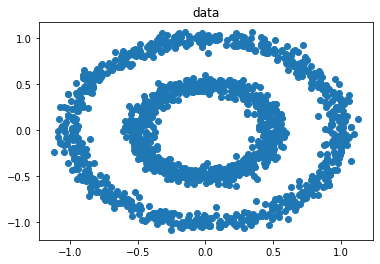

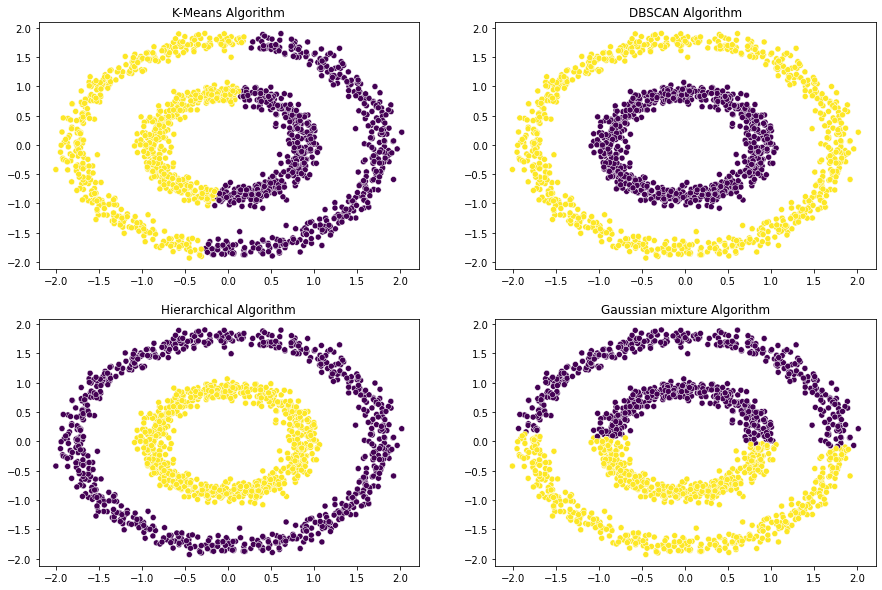

,Algorithm,Silhouette Score
0,K-Means,0.352963
1,Hierarchical,0.114204
2,DBSCAN,0.114204
3,Gaussian mixture,0.352157


In [4]:
clusters_comparison(data=dataset1, 
                    KMeans_n_clusters=2,
                    hierarchical_n_clusters=2,hierarchical_linkage='single' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=2,GM_covariance_type='full',
                    random_state=0  )

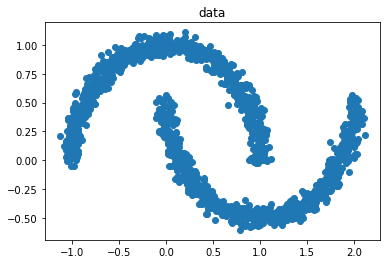

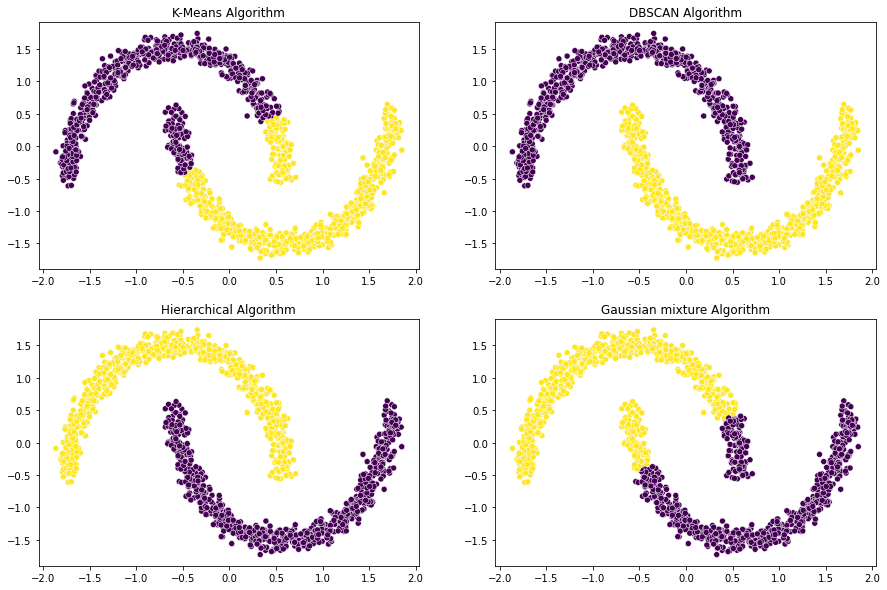

,Algorithm,Silhouette Score
0,K-Means,0.499529
1,Hierarchical,0.392331
2,DBSCAN,0.392331
3,Gaussian mixture,0.499838


In [14]:
clusters_comparison(data=dataset2, 
                    KMeans_n_clusters=2,
                    hierarchical_n_clusters=2,hierarchical_linkage='single' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=2,GM_covariance_type='full',
                    random_state=0  )

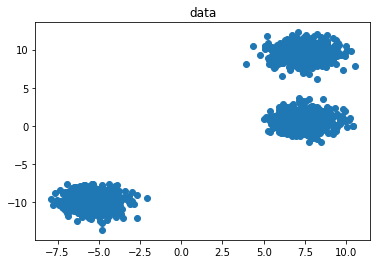

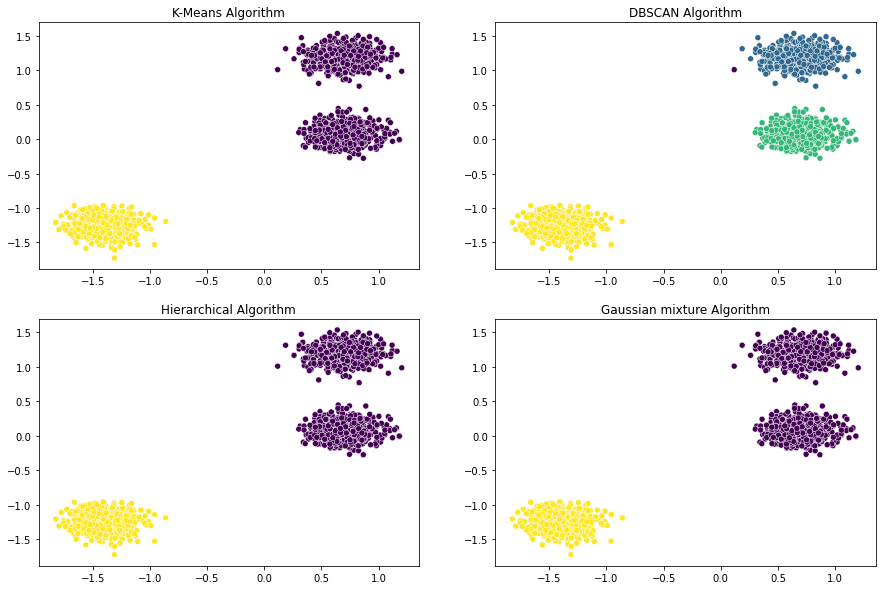

,Algorithm,Silhouette Score
0,K-Means,0.804528
1,Hierarchical,0.804528
2,DBSCAN,0.731239
3,Gaussian mixture,0.804528


In [6]:
clusters_comparison(data=dataset3, 
                    KMeans_n_clusters=2,
                    hierarchical_n_clusters=2,hierarchical_linkage='single' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=2,GM_covariance_type='full',
                    random_state=0  )

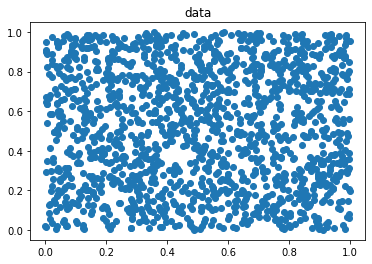

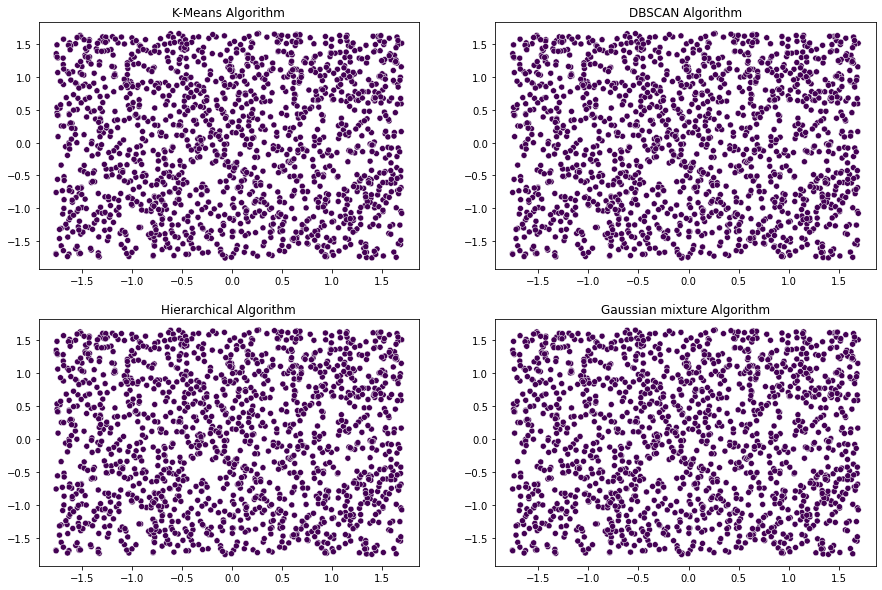

,Algorithm,Silhouette Score
0,K-Means,NaN
1,Hierarchical,NaN
2,DBSCAN,NaN
3,Gaussian mixture,NaN


In [17]:
clusters_comparison(data=dataset4, 
                    KMeans_n_clusters=1,
                    hierarchical_n_clusters=1,hierarchical_linkage='single' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=1,GM_covariance_type='full',
                    random_state=0  )

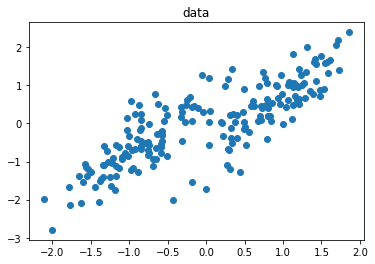

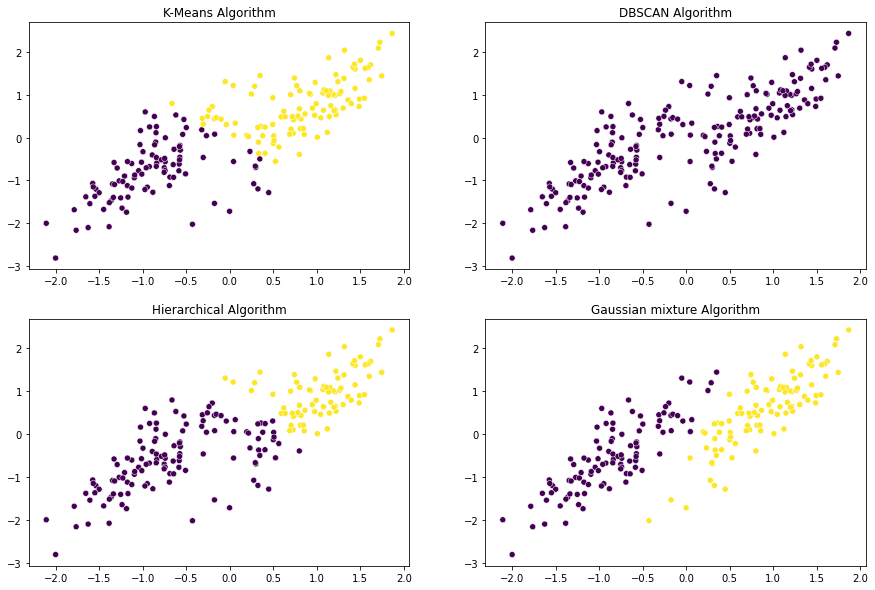

,Algorithm,Silhouette Score
0,K-Means,0.531285
1,Hierarchical,0.505278
2,DBSCAN,NaN
3,Gaussian mixture,0.449746


In [54]:
clusters_comparison(data=dataset5, 
                    KMeans_n_clusters=2,
                    hierarchical_n_clusters=2,hierarchical_linkage='ward' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=15 ,  DBSCAN_leaf_size=4,
                    GM_n_components=2,GM_covariance_type='full',
                    random_state=0  )

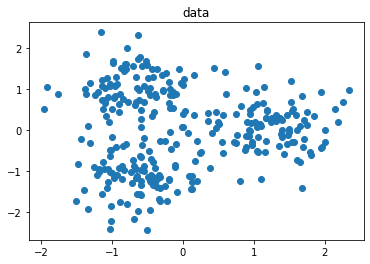

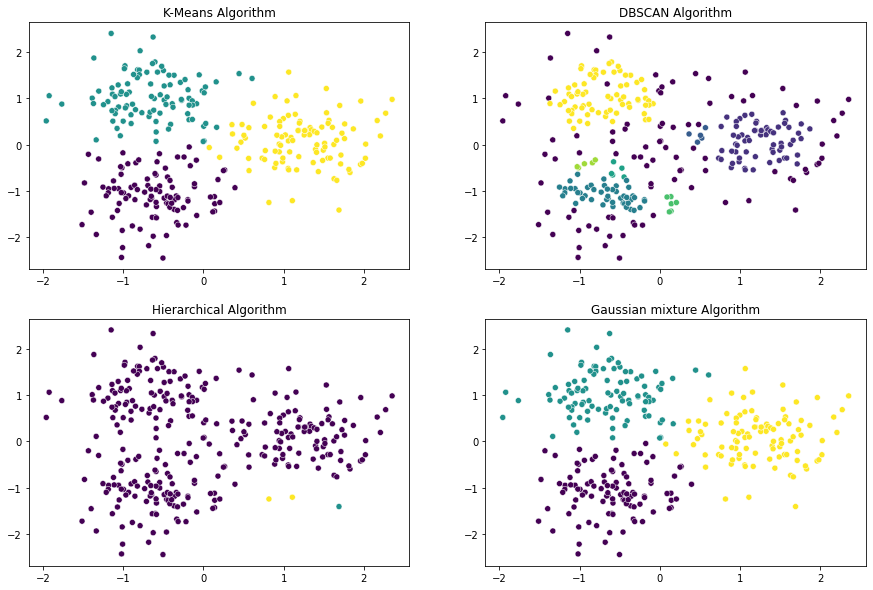

,Algorithm,Silhouette Score
0,K-Means,0.559559
1,Hierarchical,0.036718
2,DBSCAN,0.051224
3,Gaussian mixture,0.559559


In [56]:
clusters_comparison(data=dataset6, 
                    KMeans_n_clusters=3,
                    hierarchical_n_clusters=3,hierarchical_linkage='single' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=3,GM_covariance_type='full',
                    random_state=0  )

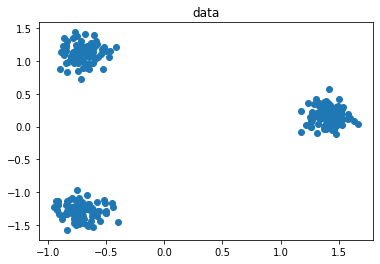

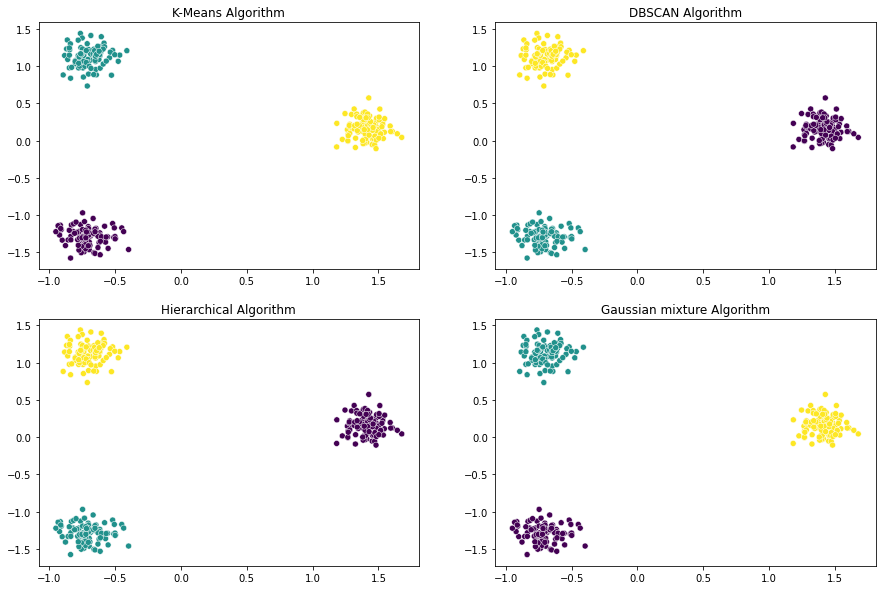

,Algorithm,Silhouette Score
0,K-Means,0.913536
1,Hierarchical,0.913536
2,DBSCAN,0.913536
3,Gaussian mixture,0.913536


In [57]:
clusters_comparison(data=dataset7, 
                    KMeans_n_clusters=3,
                    hierarchical_n_clusters=3,hierarchical_linkage='single' ,
                    DBSCAN_eps =.2, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=3,GM_covariance_type='full',
                    random_state=0  )

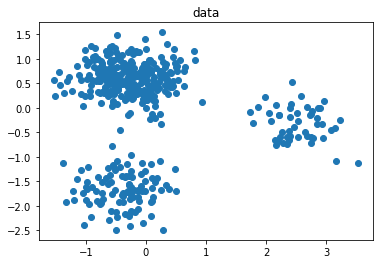

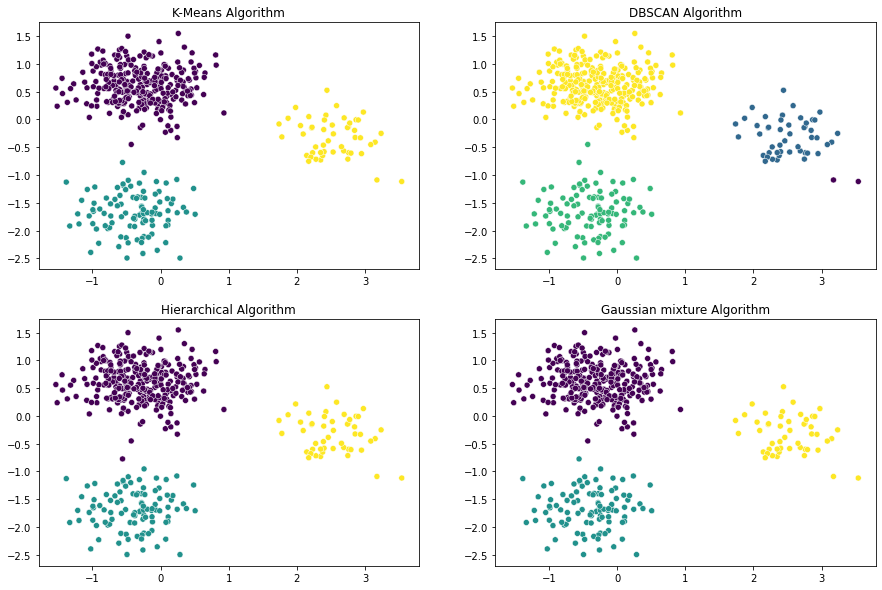

,Algorithm,Silhouette Score
0,K-Means,0.704354
1,Hierarchical,0.703119
2,DBSCAN,0.670070
3,Gaussian mixture,0.704354


In [59]:
clusters_comparison(data=dataset8, 
                    KMeans_n_clusters=3,
                    hierarchical_n_clusters=3,hierarchical_linkage='ward' ,
                    DBSCAN_eps =.5, DBSCAN_min_samples=5 ,  DBSCAN_leaf_size=30,
                    GM_n_components=3,GM_covariance_type='full',
                    random_state=0  )

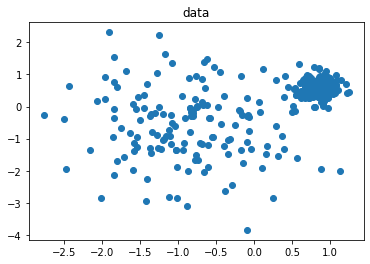

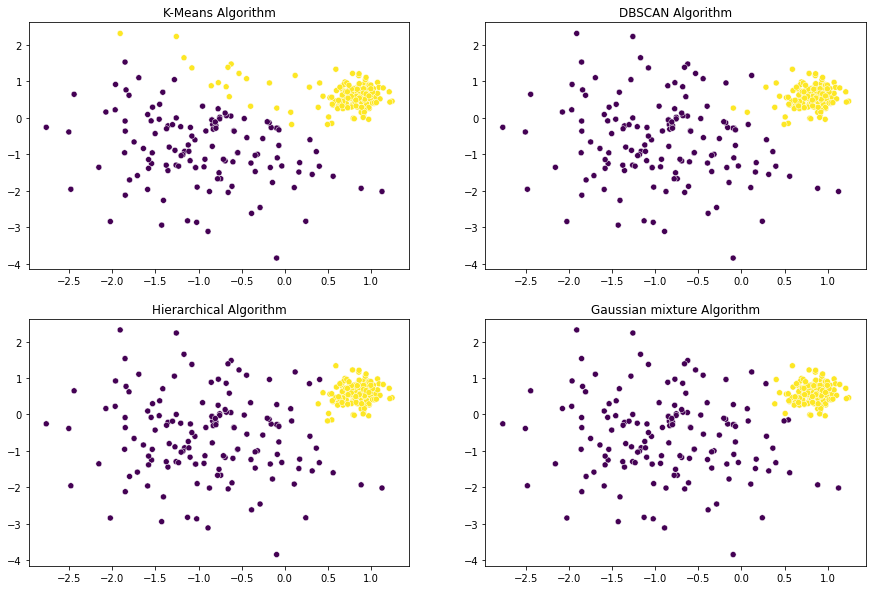

,Algorithm,Silhouette Score
0,K-Means,0.582974
1,Hierarchical,0.553880
2,DBSCAN,0.567763
3,Gaussian mixture,0.553143


In [85]:
clusters_comparison(data=dataset9, 
                    KMeans_n_clusters=2,
                    hierarchical_n_clusters=2,hierarchical_linkage='ward' ,
                    DBSCAN_eps =.5, DBSCAN_min_samples=50 ,  DBSCAN_leaf_size=50,
                    GM_n_components=2,GM_covariance_type='full',
                    random_state=0  )

1. single linkage Agglomerative Clustering is best result 
2. DBscan gives output same as  Agglomerative Clustering 
3. DBscan gives output same as Agglomerative Clustering but DBscan calssfy some points as outliers
4. i think there no clusters here 
5. the data 1 cluster but seems there correlation here but there some outliers so DBscan shows some outliers  
6. Agglomerative Clustering and Kmeans is good  
7. all cluster algortioms will give same clusters as the data highly saperated 
8. here i perfer DBscan as calssfiy some outliers
9. Agglomerative Clustering is doing a better as classify the dens cluster and the scattered cluster